In [14]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [28]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee25279

In [15]:
data = pd.read_csv("data/diabetes.csv")

In [16]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Processing

### Features and Target

In [17]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [19]:
X = np.array(X,dtype='float64')
y = np.array(y, dtype ='float64')

In [20]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(X_train)

MinMaxScaler()

In [24]:
scaled_X_train = scaler.transform(X_train)

In [25]:
scaled_X_test = scaler.transform(X_test)

## Model


### Creating the Model

In [33]:
import tensorflow as tf


In [35]:
# Import TensorFlow
import tensorflow as tf

# For compatibility mode
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

# Or using the recommended tf.keras.optimizers API
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))

# la ultima capa para clasificacion binaria
model.add(Dense(1, activation='sigmoid'))

In [38]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model Training

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(patience=14)

In [41]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=400,
          validation_data=(scaled_X_test, y_test), verbose=1 ,
          callbacks=[early_stop])

Epoch 1/400


20/20 [==============================] - 2s 19ms/step - loss: 0.6980 - accuracy: 0.4251 - val_loss: 0.6923 - val_accuracy: 0.5065
Epoch 2/400
20/20 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.6368 - val_loss: 0.6824 - val_accuracy: 0.6688
Epoch 3/400
20/20 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.6629 - val_loss: 0.6749 - val_accuracy: 0.6623
Epoch 4/400
20/20 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 0.6466 - val_loss: 0.6675 - val_accuracy: 0.6688
Epoch 5/400
20/20 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.6466 - val_loss: 0.6604 - val_accuracy: 0.6688
Epoch 6/400
20/20 [==============================] - 0s 4ms/step - loss: 0.6614 - accuracy: 0.6466 - val_loss: 0.6540 - val_accuracy: 0.6688
Epoch 7/400
20/20 [==============================] - 0s 4ms/step - loss: 0.6572 - accuracy: 0.6466 - val_loss: 0.6490 - val_accuracy: 0.6688
Epoch 8/40

## Model Evaluation

In [42]:
metrics = pd.DataFrame(model.history.history)

In [43]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.697964,0.425081,0.692313,0.506494
1,0.687786,0.636808,0.682426,0.668831
2,0.680345,0.662866,0.674905,0.662338
3,0.674181,0.646580,0.667479,0.668831
4,0.666921,0.646580,0.660401,0.668831
...,...,...,...,...
105,0.451560,0.786645,0.444107,0.785714
106,0.451625,0.794788,0.446939,0.792208
107,0.454394,0.778502,0.444130,0.792208
108,0.451410,0.794788,0.445783,0.785714


<Axes: >

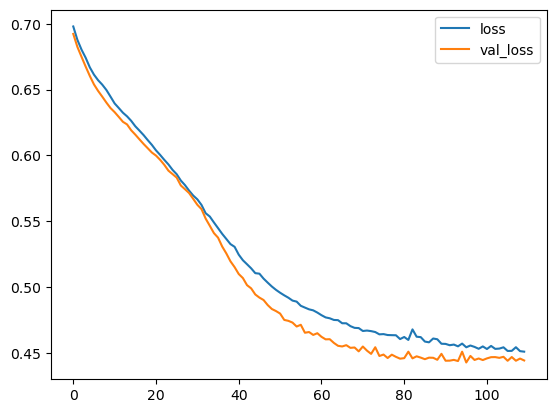

In [44]:
metrics[['loss','val_loss']].plot()

<Axes: >

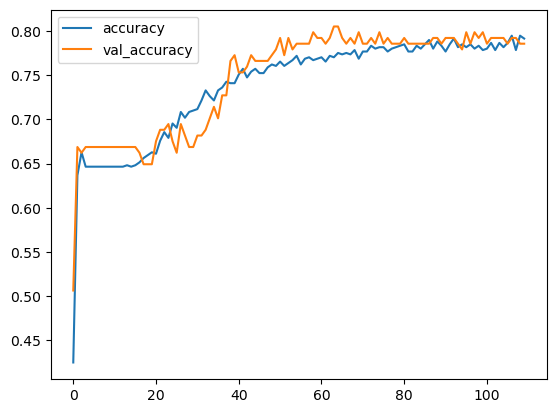

In [47]:
metrics[['accuracy', 'val_accuracy']].plot()


In [48]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.44433534145355225, 0.7857142686843872]

## Ready Model for Deployment

In [49]:
epochs = len(metrics)

In [50]:
scaled_X = scaler.fit_transform(X)

In [51]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))

# la ultima capa para clasificacion binaria
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/110
24/24 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.6510
Epoch 2/110
24/24 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6510
Epoch 3/110
24/24 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.6510
Epoch 4/110
24/24 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.6510
Epoch 5/110
24/24 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.6510
Epoch 6/110
24/24 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.6510
Epoch 7/110
24/24 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.6510
Epoch 8/110
24/24 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.6510
Epoch 9/110
24/24 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.6510
Epoch 10/110
24/24 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.6510
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.7852
Epoch 84/110
24/24 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7826
Epoch 85/110
24/24 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.7839
Epoch 86/110
24/24 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.7852
Epoch 87/110
24/24 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7865
Epoch 88/110
24/24 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7786
Epoch 89/110
24/24 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7826
Epoch 90/110
24/24 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7839
Epoch 91/110
24/24 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.7812
Epoch 92/110
24/24 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.7891
Epoch 93/110


In [53]:
model.save("final_data_model.h5")

C:\Users\nicol\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Saving Scaler

In [54]:
import joblib

In [55]:
joblib.dump(scaler,'data_scaler.pkl')

['data_scaler.pkl']

## Predicting a Single New Flower

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model = load_model("final_data_model.h5")
scaler = joblib.load("data_scaler.pkl")

In [58]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [59]:
patient_example = {'Pregnancies':3,
                 'Glucose':3.5,
                 'BloodPressure':45,
                 'SkinThickness':11,
                  'Insulin':0.5,
                  'BMI':55,
                  'DiabetesPedigreeFunction':0.78,
                  'Age':50}


In [60]:
patient_example.keys()

dict_keys(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [61]:
def return_prediction(model,scaler,sample_json):
  
    Pregnancies = sample_json['Pregnancies']
    Glucose = sample_json['Glucose']
    BloodPressure = sample_json['BloodPressure']
    SkinThickness = sample_json['SkinThickness']
    Insulin = sample_json['Insulin']
    BMI = sample_json['BMI']
    DiabetesPedigreeFunction = sample_json['DiabetesPedigreeFunction']
    Age = sample_json['Age']

    
    patient = [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, 
                BMI, DiabetesPedigreeFunction,Age]]
    
    patient = scaler.transform(patient)
    
    classes = np.array(['Normal', 'Diabetes'])
    
    predict_x = model.predict(patient)
    class_ind=np.argmax(predict_x,axis=1)
    
    return classes[class_ind][0]
                    

In [62]:
return_prediction(model,scaler,patient_example)

1/1 [==============================] - 0s 181ms/step


'Normal'

# CODE FOR DEPLOYMENT:

In [5]:
import numpy as np

def return_prediction(model, scaler, sample_json):
    # Extracting features from the sample
    features = [sample_json['Pregnancies'], sample_json['Glucose'],
                sample_json['BloodPressure'], sample_json['SkinThickness'],
                sample_json['Insulin'], sample_json['BMI'],
                sample_json['DiabetesPedigreeFunction'], sample_json['Age']]

    # Reshaping and scaling the input data
    patient = np.array([features])
    patient = scaler.transform(patient)

    # Predicting with the model
    prediction = model.predict(patient)

    # Assuming a binary classification with a single output neuron
    class_ind = (prediction > 0.5).astype(int)  # Applying threshold
    classes = np.array(['Normal', 'Diabetes'])

    return classes[class_ind[0][0]]  # Adjust indexing based on your model's output shape

# Sample input
patient_example = {
    'Pregnancies': 6,
    'Glucose': 148,
    'BloodPressure': 72,
    'SkinThickness': 35,
    'Insulin': 0,
    'BMI': 33.6,
    'DiabetesPedigreeFunction': 0.627,
    'Age': 50
}

# Assuming the model and scaler are already loaded as per your code snippet
result = return_prediction(model, scaler, patient_example)
print(result)


1/1 [==============================] - 0s 287ms/step
Diabetes
